In [1]:
import zipfile
import pandas as pd
import numpy as np


In [3]:
# Unzip dataset
with zipfile.ZipFile("/content/heart+disease.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/heart_disease_data")

# Load Cleveland dataset
file_path = "/content/heart_disease_data/processed.cleveland.data"
df = pd.read_csv(file_path, header=None)

# Add column names
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]
df.columns = columns

print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Replace '?' with NaN and convert to numeric
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)

# Drop rows with NaN values
df = df.dropna()

# Convert target: presence (1-4) → 1 (disease)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print("✅ Cleaned dataset shape:", df.shape)
df.head()


✅ Cleaned dataset shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
import os

# Create the folder if it doesn’t exist
os.makedirs("data", exist_ok=True)

# Now save the file
df.to_csv("data/cleaned_heart.csv", index=False)
print("✅ Cleaned dataset saved to data/cleaned_heart.csv")



✅ Cleaned dataset saved to data/cleaned_heart.csv


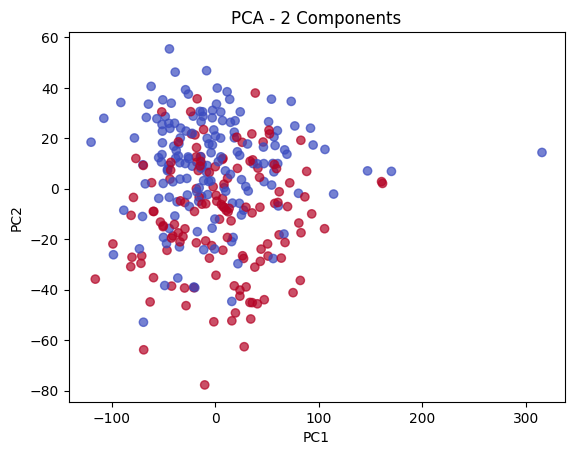

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df.drop("target", axis=1)
y = df["target"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("PCA - 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


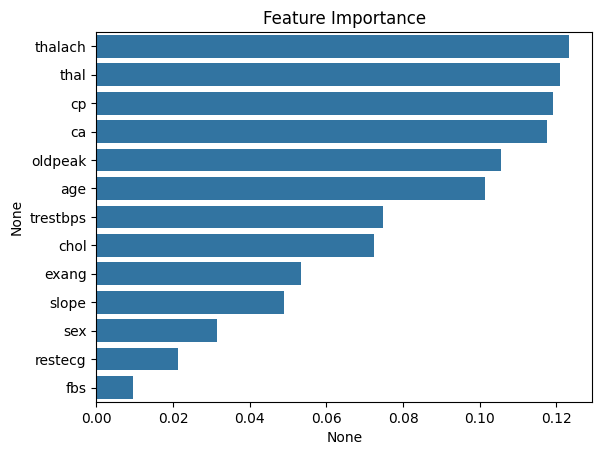

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.show()
